# RFM Analysis (Customer Segmentation)

In [3]:
# import necessary package

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#import file

orders = pd.read_excel('Dataset.xlsx', sheet_name = 'Orders')
returns = pd.read_excel('Dataset.xlsx', sheet_name = 'Return')
segmentation = pd.read_excel('Dataset.xlsx', sheet_name = 'Segmentation')
segmentation

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [5]:
#Check type: the data appears to be in good shape.

orders.info()
returns.info()
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-N

In [6]:
#Overview: data looks fine

orders.describe()

,Row ID,Postal Code,Sales,Quantity,Unit Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,53.120197
std,2885.163629,32063.693350,623.245101,2.225110,122.251398
min,1.000000,1040.000000,0.444000,1.000000,0.544500
25%,2499.250000,23223.000000,17.280000,2.000000,3.473600
50%,4997.500000,56430.500000,54.490000,3.000000,12.933600
75%,7495.750000,90008.000000,209.940000,5.000000,54.522000
max,9994.000000,99301.000000,22638.480000,14.000000,4074.926400


In [7]:
#Restructure the segmentation Dataframe

segmentation = segmentation.assign(RFM = segmentation['RFM Score'].str.split(',')).explode('RFM')
segmentation['RFM'] = segmentation['RFM'].str.strip()
segmentation

,Segment,RFM Score,RFM
0,Champions,"555, 554, 544, 545, 454, 455, 445",555
0,Champions,"555, 554, 544, 545, 454, 455, 445",554
0,Champions,"555, 554, 544, 545, 454, 455, 445",544
0,Champions,"555, 554, 544, 545, 454, 455, 445",545
0,Champions,"555, 554, 544, 545, 454, 455, 445",454
...,...,...,...
10,Lost customers,"111, 112, 121, 131,141,151",112
10,Lost customers,"111, 112, 121, 131,141,151",121
10,Lost customers,"111, 112, 121, 131,141,151",131
10,Lost customers,"111, 112, 121, 131,141,151",141


In [8]:
#Indentify successful order

success_orders = pd.merge(orders, returns, on = 'Order ID', how = 'left').query('Returned != "Yes"').reset_index()
success_orders

##Code to check: success_orders[success_orders['Customer ID']=='AA-10315'].sort_values('Order Date', ascending=False).head()

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
4,6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9189,9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9190,9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9191,9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9192,9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [9]:
#Calculating Recency

recent_date = dt.datetime(2017,12,31)
recency = success_orders.groupby(by='Customer ID', as_index=False)['Order Date'].max()
recency.columns = ['Customer ID', 'LastPurchaseDate']
recency['Recency'] = recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
recency

,Customer ID,LastPurchaseDate,Recency
0,AA-10315,2017-06-29,185
1,AA-10375,2017-12-11,20
2,AA-10480,2017-04-15,260
3,AA-10645,2016-09-04,483
4,AB-10015,2016-11-10,416
...,...,...,...
786,XP-21865,2017-10-09,83
787,YC-21895,2017-12-26,5
788,YS-21880,2017-12-21,10
789,ZC-21910,2017-11-06,55


In [17]:
#Calculating Frequency

# frequency = success_orders.drop_duplicates().groupby(by=['Customer ID'], as_index=False)['Order Date'].count()
frequency = success_orders.drop_duplicates().groupby(by=['Customer ID'], as_index=False)['Order ID'].nunique().rename(columns={'Order ID': 'Order ID Count'})
frequency.columns = ['Customer ID', 'Frequency']
frequency

,Customer ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3
...,...,...
786,XP-21865,9
787,YC-21895,4
788,YS-21880,8
789,ZC-21910,12


In [18]:
#Calculating Monetary Value

monetary = success_orders.groupby(by='Customer ID', as_index=False)['Sales'].sum()
monetary.columns = ['Customer ID', 'Monetary']
monetary

,Customer ID,Monetary
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5073.975
4,AB-10015,886.156
...,...,...
786,XP-21865,2110.726
787,YC-21895,5438.650
788,YS-21880,6720.444
789,ZC-21910,7892.998


In [19]:
#Merging all R-F-M columns in one dataframe

rfm = recency.merge(frequency, on='Customer ID').merge(monetary, on='Customer ID').drop(columns='LastPurchaseDate')
rfm

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [20]:
#Computing Quantile of RFM values (Customers with the lowest recency, highest frequency and monetary amounts considered as top customers)

rfm['r_quartile'] = pd.qcut(rfm['Recency'], 5, ['5','4','3','2','1'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 5, ['1','2','3','4','5'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 5, ['1','2','3','4','5'])

#RFM Result Interpretation

rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm

##Code to check: rfm.sort_values(by='Frequency', ascending=True).head(30)

,Customer ID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112
...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353
787,YC-21895,5,4,5438.650,5,1,5,515
788,YS-21880,10,8,6720.444,5,4,5,545
789,ZC-21910,55,12,7892.998,4,5,5,455


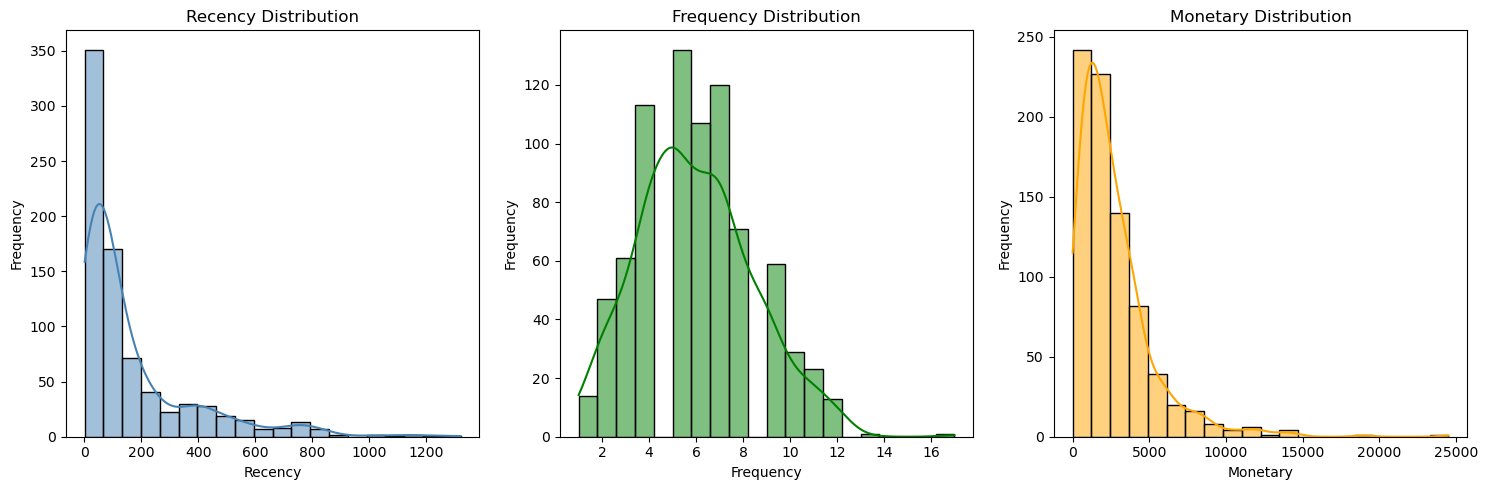

In [40]:
# Visualize the distribution of each R-F-M (Recency, Frequency, Monetary) indicator

# Create subplots for each indicator
plt.figure(figsize=(15, 5))

# Recency Distribution
plt.subplot(131)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='steelblue')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Frequency Distribution
plt.subplot(132)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

# Monetary Distribution
plt.subplot(133)
sns.histplot(rfm['Monetary'], bins=20, kde=True, color='orange')
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
#Indentify each customer 'S RFM Score

customer_segment = pd.merge(rfm, segmentation, how = 'left', left_on = 'RFM_Score', right_on = 'RFM')
customer_segment[['Customer ID','RFM_Score','Segment']]

,Customer ID,RFM_Score,Segment
0,AA-10315,225,At Risk
1,AA-10375,552,Potential Loyalist
2,AA-10480,213,About To Sleep
3,AA-10645,125,At Risk
4,AB-10015,112,Lost customers
...,...,...,...
786,XP-21865,353,Potential Loyalist
787,YC-21895,515,Promising
788,YS-21880,545,Champions
789,ZC-21910,455,Champions


In [22]:
#Detail of each segment

g = customer_segment.groupby(by=['Segment'], as_index=False).agg({'Customer ID':'count',
                                                              'Monetary':'sum',
                                                              'Recency':'mean',
                                                              'Frequency':'mean'}).sort_values(by='Recency', ascending=True).round()



total_customers = g['Customer ID'].sum()
g['Percentage'] = ((g['Customer ID'] / total_customers) * 100).round()
h = g.reindex(columns=['Segment', 'Customer ID', 'Percentage', 'Monetary', 'Recency', 'Frequency'])
h.columns = ['Segment', 'No.Customer', 'Pct', 'Total Spend', 'Avg.Recency', 'Avg.Frequency']
h

,Segment,No.Customer,Pct,Total Spend,Avg.Recency,Avg.Frequency
3,Champions,71,9.0,382097.0,29.0,10.0
10,Promising,63,8.0,224804.0,35.0,5.0
8,New Customers,61,8.0,40997.0,41.0,3.0
9,Potential Loyalist,113,14.0,190945.0,45.0,7.0
7,Need Attention,72,9.0,259412.0,50.0,7.0
6,Loyal,62,8.0,270680.0,61.0,8.0
0,About To Sleep,44,6.0,47310.0,135.0,5.0
4,Hibernating customers,90,11.0,109960.0,190.0,5.0
1,At Risk,96,12.0,385997.0,259.0,7.0
2,Cannot Lose Them,36,5.0,150230.0,497.0,5.0


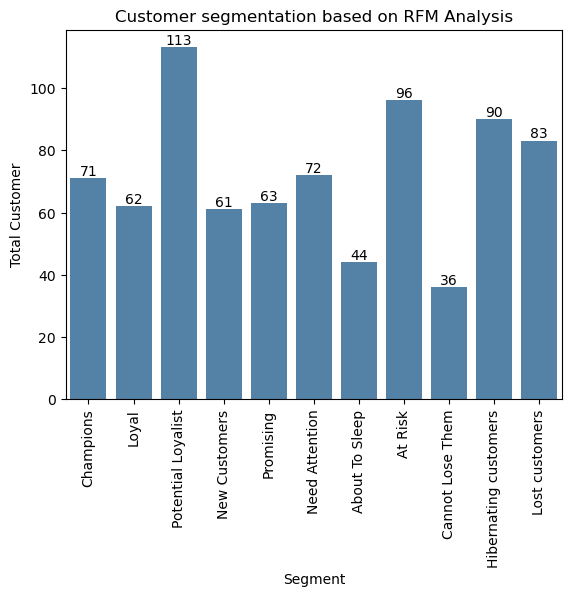

In [23]:
#Visualize quantity of each customer segment

category_order = ['Champions','Loyal','Potential Loyalist','New Customers','Promising','Need Attention','About To Sleep','At Risk','Cannot Lose Them','Hibernating customers','Lost customers']
g=sns.countplot(x='Segment', data=customer_segment, order=category_order, color='steelblue')
plt.title('Customer segmentation based on RFM Analysis')
plt.ylabel('Total Customer')
plt.xticks(rotation=90)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### Insight: 
While it is indeed positive that Champions, Loyal customers, and Potential Loyalists account for a high quantity (246 customers approximately 31%), it is crucial to acknowledge the presence of negative segments as well. Segments such as At-Risk, Lost, and Hibernating customers are also significant, comprising approximately 33% of the total.

In addition to the existing customer segments, it's worth noting that we are also attracting new customers and promising prospects, which account for approximately 16% of the total. This is another positive aspect to consider in our analysis.

### Actionable Tip for each Customer segment based on their activity

01. Champions (Bought recently, buy often, and spend the most): Reward them. Can be early adopters for new products. Will promote our brand.

02. Loyal (Spend good money with us often. Responsive to promotions): Upsell higher-value products. Ask for reviews. Engage them.

03. Potential Loyalist (Recent customers, but spent a good amount and bought more than once): Offer membership/loyalty program, and recommend other products.

04. New Customer & 5. Promising (Recent shoppers, but haven’t spent much): Create brand awareness, and offer free trials.

06. Need Attention (Above average recency, frequency, and monetary values. May not have bought it very recently though): Make limitedtime offers, and recommend based on past purchases. Reactivate them.

07. About To Sleep (Below average recency, frequency, and monetary values. Will lose them if not reactivated): Share valuable resources, recommend popular products/renewals at discounts, and reconnect with them.

08. At Risk (Spent big money and purchased often. But a long time ago. Need to bring them back): Send personalized emails to reconnect, offer renewals, and provide helpful resources

09. Can’t Lose Them (Made biggest purchases, and often. But haven’t returned for a long time): Win them back via renewals or newer products, don’t lose them to competition, talk to them.

10. Hibernating (Last purchase was long back, with low spenders and a low number of orders): Offer other relevant products and special discounts. Recreate brand value.

11. Lost (Lowest recency, frequency, and monetary scores): Revive interest with reach-out campaign, ignore otherwise.

### Based on RFM analysis, Marketing and Sale Team should primarily focus on Recency, followed by Frequency, and then Monetary.
Superstore is in the retail industry, prioritizing recency in RFM analysis can indeed be beneficial for generating better revenue:

01. Customer Engagement: 
Recent customers are more likely to be engaged and interested in making additional purchases. By targeting these customers with personalized offers, promotions, or recommendations, we can capitalize on their existing interest and increase the chances of generating revenue.

02. Repeat Purchases: 
Customers who have made a recent purchase are more likely to make repeat purchases in the near future. By focusing on this segment and nurturing their relationship with the brand through targeted marketing efforts, we can encourage them to become loyal customers and generate consistent revenue.

03. Customer Lifetime Value (CLV): 
Prioritizing recency can also have a positive impact on the CLV metric. When customers continue to make purchases and engage with the brand over time, their CLV increases. By nurturing recent customers and maximizing their value through personalized marketing strategies, we can enhance their long-term profitability our company.

04. Competitor Influence: 
In the retail industry, customers often have various options and are exposed to intense competition. By prioritizing recency, we can minimize the chances of losing customers to competitors. Engaging with recent customers promptly can help build a stronger connection and reduce the likelihood of them seeking alternative options.

While recency is an important factor to prioritize, it doesn't mean that frequency and monetary value should be completely disregarded. Frequency reflects customer loyalty and can provide insights into long-term profitability, while monetary value indicates high-spending customers who may require specific attention. By considering all three factors in RFM analysis can develop comprehensive strategies that cater to different customer segments and maximize revenue generation.